
# Assignment No 4b
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of **Random Axis-Aligned** weak learner based Random Forest, i.e. you will be randomly selecting the feature from all set of features and than setting the threshold by randomly selecting a threshold.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## TODO: 

**Complete the code in files `randomForest.py`, `tree.py` and `weakLearner.py` by writing the missing code.**

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

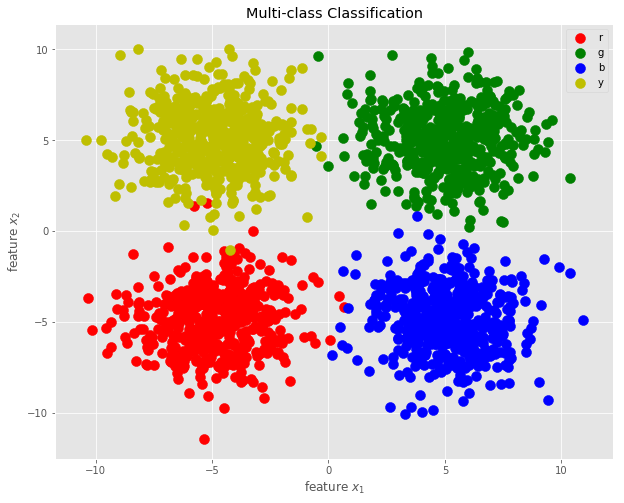

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))

In [5]:
import randomForest as rf

In [6]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random')
#rfc=rf.RandomForest(weaklearner='Axis-Aligned')

In [7]:
print X.shape, Y.shape

(2000, 2) (2000, 1)


In [8]:
#%debug
rfc.train(X,Y)

Train Decision tree 1
Train Decision tree 2
Train Decision tree 3
Train Decision tree 4
Train Decision tree 5
Train Decision tree 6
Train Decision tree 7
Train Decision tree 8
Train Decision tree 9
Train Decision tree 10
---------------------------------------------------
 A Decision Tree With Depth=4
    C(posterior=[],class=3.0,Purity=0.5)
I(Fidx=[0],Score=1.02784941959,Split=0.0962178756474)
            C(posterior=[],class=4.0,Purity=0.7)
        I(Fidx=[1],Score=0.94344975562,Split=0.155404739572)
            C(posterior=[],class=1.0,Purity=0.769230769231)
    I(Fidx=[0],Score=1.016993166,Split=-0.299822694398)
        C(posterior=[],class=4.0,Purity=0.501529051988)
---------------------------------------------------
---------------------------------------------------
 A Decision Tree With Depth=3
        C(posterior=[],class=2.0,Purity=0.98231827112)
    I(Fidx=[1],Score=0.138283604481,Split=-0.0113426484086)
        C(posterior=[],class=3.0,Purity=0.980353634578)
I(Fidx=[0],Scor

In [9]:
len(rfc.trees)

10

In [10]:
# Training Confusion Matrix...
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

[-1.00666438 -0.28840422] [0]
[-1.00666438 -0.28840422] [0]
[-1.00666438 -0.28840422] [0]
[-1.00666438 -0.28840422] [1]
[-1.00666438 -0.28840422] [1]
[-1.00666438 -0.28840422] [1]
[-1.00666438 -0.28840422] [0]
[-1.00666438 -0.28840422] [1]
[-1.00666438 -0.28840422] [1]
[-1.00666438 -0.28840422] [0]
[-1.00666438 -0.28840422] [1]
[-1.00666438 -0.28840422] [1]
[-1.00666438 -0.28840422] [1]
[-1.00666438 -0.28840422] [0]
[-1.00666438 -0.28840422] [0]
[-0.86707775 -0.52640986] [0]
[-0.86707775 -0.52640986] [0]
[-0.86707775 -0.52640986] [0]
[-0.86707775 -0.52640986] [1]
[-0.86707775 -0.52640986] [1]
[-0.86707775 -0.52640986] [1]
[-0.86707775 -0.52640986] [0]
[-0.86707775 -0.52640986] [1]
[-0.86707775 -0.52640986] [1]
[-0.86707775 -0.52640986] [0]
[-0.86707775 -0.52640986] [1]
[-0.86707775 -0.52640986] [1]
[-0.86707775 -0.52640986] [0]
[-1.01068616 -0.98410579] [0]
[-1.01068616 -0.98410579] [0]
[-1.01068616 -0.98410579] [0]
[-1.01068616 -0.98410579] [1]
[-1.01068616 -0.98410579] [1]
[-1.010686

[-1.29635425 -1.32104624] [1]
[-1.29635425 -1.32104624] [1]
[-1.29635425 -1.32104624] [0]
[-1.29635425 -1.32104624] [1]
[-1.29635425 -1.32104624] [1]
[-1.29635425 -1.32104624] [0]
[-1.29635425 -1.32104624] [1]
[-1.29635425 -1.32104624] [1]
[-1.29635425 -1.32104624] [0]
[-1.02884998 -1.2445531 ] [0]
[-1.02884998 -1.2445531 ] [0]
[-1.02884998 -1.2445531 ] [0]
[-1.02884998 -1.2445531 ] [1]
[-1.02884998 -1.2445531 ] [1]
[-1.02884998 -1.2445531 ] [1]
[-1.02884998 -1.2445531 ] [0]
[-1.02884998 -1.2445531 ] [1]
[-1.02884998 -1.2445531 ] [1]
[-1.02884998 -1.2445531 ] [0]
[-1.02884998 -1.2445531 ] [1]
[-1.02884998 -1.2445531 ] [1]
[-1.02884998 -1.2445531 ] [0]
[-1.27552924 -0.94690893] [0]
[-1.27552924 -0.94690893] [0]
[-1.27552924 -0.94690893] [0]
[-1.27552924 -0.94690893] [1]
[-1.27552924 -0.94690893] [1]
[-1.27552924 -0.94690893] [1]
[-1.27552924 -0.94690893] [0]
[-1.27552924 -0.94690893] [1]
[-1.27552924 -0.94690893] [1]
[-1.27552924 -0.94690893] [0]
[-1.27552924 -0.94690893] [1]
[-1.275529

[-0.786034   -1.41506291] [1]
[-0.786034   -1.41506291] [0]
[-0.44151801 -1.16869311] [0]
[-0.44151801 -1.16869311] [0]
[-0.44151801 -1.16869311] [0]
[-0.44151801 -1.16869311] [1]
[-0.44151801 -1.16869311] [1]
[-0.44151801 -1.16869311] [1]
[-0.44151801 -1.16869311] [0]
[-0.44151801 -1.16869311] [1]
[-0.44151801 -1.16869311] [1]
[-0.44151801 -1.16869311] [0]
[-0.44151801 -1.16869311] [1]
[-0.44151801 -1.16869311] [1]
[-0.44151801 -1.16869311] [0]
[-0.67318216 -0.88895654] [0]
[-0.67318216 -0.88895654] [0]
[-0.67318216 -0.88895654] [0]
[-0.67318216 -0.88895654] [1]
[-0.67318216 -0.88895654] [1]
[-0.67318216 -0.88895654] [1]
[-0.67318216 -0.88895654] [0]
[-0.67318216 -0.88895654] [1]
[-0.67318216 -0.88895654] [1]
[-0.67318216 -0.88895654] [0]
[-0.67318216 -0.88895654] [1]
[-0.67318216 -0.88895654] [1]
[-0.67318216 -0.88895654] [0]
[-1.07851686 -1.13525375] [0]
[-1.07851686 -1.13525375] [0]
[-1.07851686 -1.13525375] [0]
[-1.07851686 -1.13525375] [1]
[-1.07851686 -1.13525375] [1]
[-1.078516

[-0.69439522 -1.13177529] [1]
[-0.69439522 -1.13177529] [1]
[-0.69439522 -1.13177529] [0]
[-0.69439522 -1.13177529] [1]
[-0.69439522 -1.13177529] [1]
[-0.69439522 -1.13177529] [0]
[-0.69439522 -1.13177529] [1]
[-0.69439522 -1.13177529] [1]
[-0.69439522 -1.13177529] [0]
[-1.26181356 -1.30434932] [0]
[-1.26181356 -1.30434932] [0]
[-1.26181356 -1.30434932] [0]
[-1.26181356 -1.30434932] [1]
[-1.26181356 -1.30434932] [1]
[-1.26181356 -1.30434932] [1]
[-1.26181356 -1.30434932] [0]
[-1.26181356 -1.30434932] [1]
[-1.26181356 -1.30434932] [1]
[-1.26181356 -1.30434932] [0]
[-1.26181356 -1.30434932] [1]
[-1.26181356 -1.30434932] [1]
[-1.26181356 -1.30434932] [0]
[-0.48214138 -1.23947951] [0]
[-0.48214138 -1.23947951] [0]
[-0.48214138 -1.23947951] [0]
[-0.48214138 -1.23947951] [1]
[-0.48214138 -1.23947951] [1]
[-0.48214138 -1.23947951] [1]
[-0.48214138 -1.23947951] [0]
[-0.48214138 -1.23947951] [1]
[-0.48214138 -1.23947951] [1]
[-0.48214138 -1.23947951] [0]
[-0.48214138 -1.23947951] [1]
[-0.482141

[-1.27287362 -0.78781541] [0]
[-1.27287362 -0.78781541] [1]
[-1.27287362 -0.78781541] [1]
[-1.27287362 -0.78781541] [0]
[-1.27287362 -0.78781541] [1]
[-1.27287362 -0.78781541] [1]
[-1.27287362 -0.78781541] [0]
[-1.19078272 -1.42084121] [0]
[-1.19078272 -1.42084121] [0]
[-1.19078272 -1.42084121] [0]
[-1.19078272 -1.42084121] [1]
[-1.19078272 -1.42084121] [1]
[-1.19078272 -1.42084121] [1]
[-1.19078272 -1.42084121] [0]
[-1.19078272 -1.42084121] [1]
[-1.19078272 -1.42084121] [1]
[-1.19078272 -1.42084121] [0]
[-1.19078272 -1.42084121] [1]
[-1.19078272 -1.42084121] [1]
[-1.19078272 -1.42084121] [0]
[-0.86685387 -0.2216744 ] [0]
[-0.86685387 -0.2216744 ] [0]
[-0.86685387 -0.2216744 ] [0]
[-0.86685387 -0.2216744 ] [1]
[-0.86685387 -0.2216744 ] [1]
[-0.86685387 -0.2216744 ] [0]
[-0.86685387 -0.2216744 ] [1]
[-0.86685387 -0.2216744 ] [1]
[-0.86685387 -0.2216744 ] [0]
[-0.86685387 -0.2216744 ] [1]
[-0.86685387 -0.2216744 ] [1]
[-0.86685387 -0.2216744 ] [0]
[-0.86685387 -0.2216744 ] [1]
[-0.866853

[-1.05351894 -1.39421317] [0]
[-1.05351894 -1.39421317] [1]
[-1.05351894 -1.39421317] [1]
[-1.05351894 -1.39421317] [1]
[-1.05351894 -1.39421317] [0]
[-1.05351894 -1.39421317] [1]
[-1.05351894 -1.39421317] [1]
[-1.05351894 -1.39421317] [0]
[-1.05351894 -1.39421317] [1]
[-1.05351894 -1.39421317] [1]
[-1.05351894 -1.39421317] [0]
[-1.32053708 -1.04317029] [0]
[-1.32053708 -1.04317029] [0]
[-1.32053708 -1.04317029] [0]
[-1.32053708 -1.04317029] [1]
[-1.32053708 -1.04317029] [1]
[-1.32053708 -1.04317029] [1]
[-1.32053708 -1.04317029] [0]
[-1.32053708 -1.04317029] [1]
[-1.32053708 -1.04317029] [1]
[-1.32053708 -1.04317029] [0]
[-1.32053708 -1.04317029] [1]
[-1.32053708 -1.04317029] [1]
[-1.32053708 -1.04317029] [0]
[-0.82604748 -0.70113996] [0]
[-0.82604748 -0.70113996] [0]
[-0.82604748 -0.70113996] [0]
[-0.82604748 -0.70113996] [1]
[-0.82604748 -0.70113996] [1]
[-0.82604748 -0.70113996] [1]
[-0.82604748 -0.70113996] [0]
[-0.82604748 -0.70113996] [1]
[-0.82604748 -0.70113996] [1]
[-0.826047

[-0.98021118 -0.6595793 ] [1]
[-0.98021118 -0.6595793 ] [1]
[-0.98021118 -0.6595793 ] [1]
[-0.98021118 -0.6595793 ] [0]
[-0.98021118 -0.6595793 ] [1]
[-0.98021118 -0.6595793 ] [1]
[-0.98021118 -0.6595793 ] [0]
[-0.98021118 -0.6595793 ] [1]
[-0.98021118 -0.6595793 ] [1]
[-0.98021118 -0.6595793 ] [0]
[-1.01708112 -0.66689867] [0]
[-1.01708112 -0.66689867] [0]
[-1.01708112 -0.66689867] [0]
[-1.01708112 -0.66689867] [1]
[-1.01708112 -0.66689867] [1]
[-1.01708112 -0.66689867] [1]
[-1.01708112 -0.66689867] [0]
[-1.01708112 -0.66689867] [1]
[-1.01708112 -0.66689867] [1]
[-1.01708112 -0.66689867] [0]
[-1.01708112 -0.66689867] [1]
[-1.01708112 -0.66689867] [1]
[-1.01708112 -0.66689867] [0]
[-1.34937866 -1.06808918] [0]
[-1.34937866 -1.06808918] [0]
[-1.34937866 -1.06808918] [0]
[-1.34937866 -1.06808918] [1]
[-1.34937866 -1.06808918] [1]
[-1.34937866 -1.06808918] [1]
[-1.34937866 -1.06808918] [0]
[-1.34937866 -1.06808918] [1]
[-1.34937866 -1.06808918] [1]
[-1.34937866 -1.06808918] [0]
[-1.349378

[-0.58504104 -0.6439494 ] [1]
[-0.58504104 -0.6439494 ] [1]
[-0.58504104 -0.6439494 ] [0]
[-0.13878929 -0.49267681] [0]
[-0.13878929 -0.49267681] [0]
[-0.13878929 -0.49267681] [1]
[-0.13878929 -0.49267681] [0]
[-0.13878929 -0.49267681] [1]
[-0.13878929 -0.49267681] [1]
[-0.13878929 -0.49267681] [1]
[-0.13878929 -0.49267681] [1]
[-0.13878929 -0.49267681] [0]
[-0.13878929 -0.49267681] [1]
[-0.13878929 -0.49267681] [1]
[-0.13878929 -0.49267681] [0]
[-0.13878929 -0.49267681] [0]
[-0.13878929 -0.49267681] [1]
[-0.13878929 -0.49267681] [1]
[-0.13878929 -0.49267681] [0]
[-0.13878929 -0.49267681] [0]
[-0.68444745 -0.94556646] [0]
[-0.68444745 -0.94556646] [0]
[-0.68444745 -0.94556646] [0]
[-0.68444745 -0.94556646] [1]
[-0.68444745 -0.94556646] [1]
[-0.68444745 -0.94556646] [1]
[-0.68444745 -0.94556646] [0]
[-0.68444745 -0.94556646] [1]
[-0.68444745 -0.94556646] [1]
[-0.68444745 -0.94556646] [0]
[-0.68444745 -0.94556646] [1]
[-0.68444745 -0.94556646] [1]
[-0.68444745 -0.94556646] [0]
[-0.694614

[ 1.55214676  1.03491869] [1]
[ 1.55214676  1.03491869] [1]
[ 1.55214676  1.03491869] [0]
[ 1.55214676  1.03491869] [0]
[ 1.55214676  1.03491869] [0]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [1]
[ 0.92516202  0.81228179] [1]
[ 0.92516202  0.81228179] [1]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [1]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [1]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [1]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [1]
[ 0.92516202  0.81228179] [1]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [0]
[ 0.92516202  0.81228179] [0]
[ 1.31772508  0.92458143] [0]
[ 1.31772508  0.92458143] [0]
[ 1.31772508  0.92458143] [1]
[ 1.31772508  0.92458143] [1]
[ 1.31772508  0.92458143] [1]
[ 1.31772508  0.92458143] [0]
[ 1.31772508  0.92458143] [1]
[ 1.31772508  0.92458143] [0]
[ 1.317725

[ 1.06083462  0.54871933] [0]
[ 1.06083462  0.54871933] [0]
[ 1.06083462  0.54871933] [0]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [1]
[ 0.97174903  1.0908751 ] [1]
[ 0.97174903  1.0908751 ] [1]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [1]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [1]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [1]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [1]
[ 0.97174903  1.0908751 ] [1]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [0]
[ 0.97174903  1.0908751 ] [0]
[ 0.94544364  0.86179039] [0]
[ 0.94544364  0.86179039] [0]
[ 0.94544364  0.86179039] [1]
[ 0.94544364  0.86179039] [1]
[ 0.94544364  0.86179039] [1]
[ 0.94544364  0.86179039] [0]
[ 0.94544364  0.86179039] [1]
[ 0.94544364  0.86179039] [0]
[ 0.94544364  0.86179039] [0]
[ 0.94544364  0.86179039] [1]
[ 0.945443

[ 1.22078801  1.53129383] [0]
[ 1.22078801  1.53129383] [0]
[ 1.22078801  1.53129383] [0]
[ 1.22078801  1.53129383] [1]
[ 1.22078801  1.53129383] [0]
[ 1.22078801  1.53129383] [1]
[ 1.22078801  1.53129383] [1]
[ 1.22078801  1.53129383] [0]
[ 1.22078801  1.53129383] [0]
[ 1.22078801  1.53129383] [0]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [1]
[ 0.68084242  0.92181261] [1]
[ 0.68084242  0.92181261] [1]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [1]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [1]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [1]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [1]
[ 0.68084242  0.92181261] [1]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [0]
[ 0.68084242  0.92181261] [0]
[ 0.29456322  0.71422405] [0]
[ 0.29456322  0.71422405] [0]
[ 0.29456322  0.71422405] [1]
[ 0.294563

[ 1.01130287  0.94312794] [1]
[ 1.01130287  0.94312794] [0]
[ 1.01130287  0.94312794] [1]
[ 1.01130287  0.94312794] [0]
[ 1.01130287  0.94312794] [0]
[ 1.01130287  0.94312794] [1]
[ 1.01130287  0.94312794] [0]
[ 1.01130287  0.94312794] [0]
[ 1.01130287  0.94312794] [0]
[ 1.01130287  0.94312794] [1]
[ 1.01130287  0.94312794] [0]
[ 1.01130287  0.94312794] [1]
[ 1.01130287  0.94312794] [1]
[ 1.01130287  0.94312794] [0]
[ 1.01130287  0.94312794] [0]
[ 1.01130287  0.94312794] [0]
[ 1.0948035   0.80493263] [0]
[ 1.0948035   0.80493263] [0]
[ 1.0948035   0.80493263] [1]
[ 1.0948035   0.80493263] [1]
[ 1.0948035   0.80493263] [1]
[ 1.0948035   0.80493263] [0]
[ 1.0948035   0.80493263] [1]
[ 1.0948035   0.80493263] [0]
[ 1.0948035   0.80493263] [0]
[ 1.0948035   0.80493263] [1]
[ 1.0948035   0.80493263] [0]
[ 1.0948035   0.80493263] [0]
[ 1.0948035   0.80493263] [0]
[ 1.0948035   0.80493263] [1]
[ 1.0948035   0.80493263] [0]
[ 1.0948035   0.80493263] [1]
[ 1.0948035   0.80493263] [1]
[ 1.094803

[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [1]
[ 0.90039465  0.62481877] [1]
[ 0.90039465  0.62481877] [1]
[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [1]
[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [1]
[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [1]
[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [1]
[ 0.90039465  0.62481877] [1]
[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [0]
[ 0.90039465  0.62481877] [0]
[ 1.21856007  0.83502714] [0]
[ 1.21856007  0.83502714] [0]
[ 1.21856007  0.83502714] [1]
[ 1.21856007  0.83502714] [1]
[ 1.21856007  0.83502714] [1]
[ 1.21856007  0.83502714] [0]
[ 1.21856007  0.83502714] [1]
[ 1.21856007  0.83502714] [0]
[ 1.21856007  0.83502714] [0]
[ 1.21856007  0.83502714] [1]
[ 1.21856007  0.83502714] [0]
[ 1.21856007  0.83502714] [0]
[ 1.21856007  0.83502714] [0]
[ 1.218560

[ 0.3316962   0.88775255] [0]
[ 0.3316962   0.88775255] [0]
[ 0.3316962   0.88775255] [0]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [1]
[ 0.71283391  0.28971276] [1]
[ 0.71283391  0.28971276] [1]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [1]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [1]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [1]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [1]
[ 0.71283391  0.28971276] [1]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [0]
[ 0.71283391  0.28971276] [0]
[ 1.48717876  0.87616343] [0]
[ 1.48717876  0.87616343] [0]
[ 1.48717876  0.87616343] [1]
[ 1.48717876  0.87616343] [1]
[ 1.48717876  0.87616343] [1]
[ 1.48717876  0.87616343] [0]
[ 1.48717876  0.87616343] [1]
[ 1.48717876  0.87616343] [0]
[ 1.48717876  0.87616343] [0]
[ 1.487178

[ 1.04008125  0.81876682] [0]
[ 1.04008125  0.81876682] [1]
[ 1.04008125  0.81876682] [0]
[ 1.04008125  0.81876682] [0]
[ 1.04008125  0.81876682] [1]
[ 1.04008125  0.81876682] [0]
[ 1.04008125  0.81876682] [0]
[ 1.04008125  0.81876682] [0]
[ 1.04008125  0.81876682] [1]
[ 1.04008125  0.81876682] [0]
[ 1.04008125  0.81876682] [1]
[ 1.04008125  0.81876682] [1]
[ 1.04008125  0.81876682] [0]
[ 1.04008125  0.81876682] [0]
[ 1.04008125  0.81876682] [0]
[ 1.74518945  0.8041029 ] [0]
[ 1.74518945  0.8041029 ] [0]
[ 1.74518945  0.8041029 ] [1]
[ 1.74518945  0.8041029 ] [1]
[ 1.74518945  0.8041029 ] [1]
[ 1.74518945  0.8041029 ] [0]
[ 1.74518945  0.8041029 ] [1]
[ 1.74518945  0.8041029 ] [0]
[ 1.74518945  0.8041029 ] [0]
[ 1.74518945  0.8041029 ] [1]
[ 1.74518945  0.8041029 ] [0]
[ 1.74518945  0.8041029 ] [0]
[ 1.74518945  0.8041029 ] [0]
[ 1.74518945  0.8041029 ] [1]
[ 1.74518945  0.8041029 ] [0]
[ 1.74518945  0.8041029 ] [1]
[ 1.74518945  0.8041029 ] [1]
[ 1.74518945  0.8041029 ] [0]
[ 1.745189

[ 0.93638722  0.30470138] [0]
[ 0.93638722  0.30470138] [0]
[ 0.93638722  0.30470138] [1]
[ 0.93638722  0.30470138] [0]
[ 0.93638722  0.30470138] [1]
[ 0.93638722  0.30470138] [1]
[ 0.93638722  0.30470138] [0]
[ 0.93638722  0.30470138] [0]
[ 0.93638722  0.30470138] [0]
[ 0.93638722  0.30470138] [0]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [1]
[ 0.44261423  0.40240398] [1]
[ 0.44261423  0.40240398] [1]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [1]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [1]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [1]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [1]
[ 0.44261423  0.40240398] [1]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [0]
[ 0.44261423  0.40240398] [0]
[ 0.32734911  1.34382478] [0]
[ 0.32734911  1.34382478] [0]
[ 0.327349

[ 0.98623728  0.37733619] [1]
[ 0.98623728  0.37733619] [0]
[ 0.98623728  0.37733619] [1]
[ 0.98623728  0.37733619] [1]
[ 0.98623728  0.37733619] [0]
[ 0.98623728  0.37733619] [0]
[ 0.98623728  0.37733619] [0]
[ 0.98623728  0.37733619] [0]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [1]
[ 1.51922439  1.29252966] [1]
[ 1.51922439  1.29252966] [1]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [1]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [1]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [1]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [1]
[ 1.51922439  1.29252966] [1]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [0]
[ 1.51922439  1.29252966] [0]
[ 0.37603374  0.80502448] [0]
[ 0.37603374  0.80502448] [0]
[ 0.37603374  0.80502448] [1]
[ 0.37603374  0.80502448] [1]
[ 0.37603374  0.80502448] [1]
[ 0.376033

[ 0.99952685  1.36031681] [0]
[ 0.99952685  1.36031681] [1]
[ 0.99952685  1.36031681] [1]
[ 0.99952685  1.36031681] [1]
[ 0.99952685  1.36031681] [0]
[ 0.99952685  1.36031681] [1]
[ 0.99952685  1.36031681] [0]
[ 0.99952685  1.36031681] [0]
[ 0.99952685  1.36031681] [1]
[ 0.99952685  1.36031681] [0]
[ 0.99952685  1.36031681] [0]
[ 0.99952685  1.36031681] [0]
[ 0.99952685  1.36031681] [1]
[ 0.99952685  1.36031681] [0]
[ 0.99952685  1.36031681] [1]
[ 0.99952685  1.36031681] [1]
[ 0.99952685  1.36031681] [0]
[ 0.99952685  1.36031681] [0]
[ 0.99952685  1.36031681] [0]
[ 0.85052179  0.96526345] [0]
[ 0.85052179  0.96526345] [0]
[ 0.85052179  0.96526345] [1]
[ 0.85052179  0.96526345] [1]
[ 0.85052179  0.96526345] [1]
[ 0.85052179  0.96526345] [0]
[ 0.85052179  0.96526345] [1]
[ 0.85052179  0.96526345] [0]
[ 0.85052179  0.96526345] [0]
[ 0.85052179  0.96526345] [1]
[ 0.85052179  0.96526345] [0]
[ 0.85052179  0.96526345] [0]
[ 0.85052179  0.96526345] [0]
[ 0.85052179  0.96526345] [1]
[ 0.850521

[ 1.37407924  0.80923515] [0]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [1]
[ 0.95637788  1.09753051] [1]
[ 0.95637788  1.09753051] [1]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [1]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [1]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [1]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [1]
[ 0.95637788  1.09753051] [1]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [0]
[ 0.95637788  1.09753051] [0]
[ 1.42012095 -0.33158597] [0]
[ 1.42012095 -0.33158597] [0]
[ 1.42012095 -0.33158597] [1]
[ 1.42012095 -0.33158597] [1]
[ 1.42012095 -0.33158597] [1]
[ 1.42012095 -0.33158597] [1]
[ 1.42012095 -0.33158597] [0]
[ 1.42012095 -0.33158597] [1]
[ 1.42012095 -0.33158597] [0]
[ 1.42012095 -0.33158597] [0]
[ 1.42012095 -0.33158597] [1]
[ 1.42012095 -0.33158597] [1]
[ 1.420120

[ 0.21923451 -1.36303437] [0]
[ 0.21923451 -1.36303437] [0]
[ 0.21923451 -1.36303437] [0]
[ 1.42294029 -0.6983919 ] [0]
[ 1.42294029 -0.6983919 ] [0]
[ 1.42294029 -0.6983919 ] [1]
[ 1.42294029 -0.6983919 ] [1]
[ 1.42294029 -0.6983919 ] [1]
[ 1.42294029 -0.6983919 ] [1]
[ 1.42294029 -0.6983919 ] [0]
[ 1.42294029 -0.6983919 ] [1]
[ 1.42294029 -0.6983919 ] [0]
[ 1.42294029 -0.6983919 ] [0]
[ 1.42294029 -0.6983919 ] [1]
[ 1.42294029 -0.6983919 ] [1]
[ 1.42294029 -0.6983919 ] [0]
[ 1.42294029 -0.6983919 ] [0]
[ 1.42294029 -0.6983919 ] [0]
[ 1.39867484 -1.11415041] [0]
[ 1.39867484 -1.11415041] [0]
[ 1.39867484 -1.11415041] [1]
[ 1.39867484 -1.11415041] [1]
[ 1.39867484 -1.11415041] [1]
[ 1.39867484 -1.11415041] [1]
[ 1.39867484 -1.11415041] [0]
[ 1.39867484 -1.11415041] [1]
[ 1.39867484 -1.11415041] [0]
[ 1.39867484 -1.11415041] [0]
[ 1.39867484 -1.11415041] [1]
[ 1.39867484 -1.11415041] [1]
[ 1.39867484 -1.11415041] [0]
[ 1.39867484 -1.11415041] [0]
[ 1.39867484 -1.11415041] [0]
[ 1.473614

[ 0.90372092 -0.72032276] [1]
[ 0.90372092 -0.72032276] [0]
[ 0.90372092 -0.72032276] [0]
[ 0.90372092 -0.72032276] [0]
[ 1.39207579 -1.61017558] [0]
[ 1.39207579 -1.61017558] [0]
[ 1.39207579 -1.61017558] [1]
[ 1.39207579 -1.61017558] [1]
[ 1.39207579 -1.61017558] [1]
[ 1.39207579 -1.61017558] [1]
[ 1.39207579 -1.61017558] [0]
[ 1.39207579 -1.61017558] [1]
[ 1.39207579 -1.61017558] [0]
[ 1.39207579 -1.61017558] [0]
[ 1.39207579 -1.61017558] [1]
[ 1.39207579 -1.61017558] [1]
[ 1.39207579 -1.61017558] [0]
[ 1.39207579 -1.61017558] [0]
[ 1.39207579 -1.61017558] [0]
[ 1.13357488 -0.58400976] [0]
[ 1.13357488 -0.58400976] [0]
[ 1.13357488 -0.58400976] [1]
[ 1.13357488 -0.58400976] [1]
[ 1.13357488 -0.58400976] [1]
[ 1.13357488 -0.58400976] [1]
[ 1.13357488 -0.58400976] [0]
[ 1.13357488 -0.58400976] [1]
[ 1.13357488 -0.58400976] [0]
[ 1.13357488 -0.58400976] [0]
[ 1.13357488 -0.58400976] [1]
[ 1.13357488 -0.58400976] [1]
[ 1.13357488 -0.58400976] [0]
[ 1.13357488 -0.58400976] [0]
[ 1.133574

[ 1.15630722 -0.57516127] [1]
[ 1.15630722 -0.57516127] [1]
[ 1.15630722 -0.57516127] [1]
[ 1.15630722 -0.57516127] [0]
[ 1.15630722 -0.57516127] [1]
[ 1.15630722 -0.57516127] [0]
[ 1.15630722 -0.57516127] [0]
[ 1.15630722 -0.57516127] [1]
[ 1.15630722 -0.57516127] [1]
[ 1.15630722 -0.57516127] [0]
[ 1.15630722 -0.57516127] [0]
[ 1.15630722 -0.57516127] [0]
[ 0.59997186 -0.93788145] [0]
[ 0.59997186 -0.93788145] [0]
[ 0.59997186 -0.93788145] [1]
[ 0.59997186 -0.93788145] [1]
[ 0.59997186 -0.93788145] [1]
[ 0.59997186 -0.93788145] [1]
[ 0.59997186 -0.93788145] [0]
[ 0.59997186 -0.93788145] [1]
[ 0.59997186 -0.93788145] [0]
[ 0.59997186 -0.93788145] [0]
[ 0.59997186 -0.93788145] [1]
[ 0.59997186 -0.93788145] [1]
[ 0.59997186 -0.93788145] [0]
[ 0.59997186 -0.93788145] [0]
[ 0.59997186 -0.93788145] [0]
[ 0.6620545 -1.3232195] [0]
[ 0.6620545 -1.3232195] [0]
[ 0.6620545 -1.3232195] [1]
[ 0.6620545 -1.3232195] [1]
[ 0.6620545 -1.3232195] [1]
[ 0.6620545 -1.3232195] [1]
[ 0.6620545 -1.3232195

[ 1.03613936 -1.57270108] [0]
[ 1.03613936 -1.57270108] [0]
[ 1.03613936 -1.57270108] [1]
[ 1.03613936 -1.57270108] [1]
[ 1.03613936 -1.57270108] [1]
[ 1.03613936 -1.57270108] [1]
[ 1.03613936 -1.57270108] [0]
[ 1.03613936 -1.57270108] [1]
[ 1.03613936 -1.57270108] [0]
[ 1.03613936 -1.57270108] [0]
[ 1.03613936 -1.57270108] [1]
[ 1.03613936 -1.57270108] [1]
[ 1.03613936 -1.57270108] [0]
[ 1.03613936 -1.57270108] [0]
[ 1.03613936 -1.57270108] [0]
[ 1.19209486 -1.28739035] [0]
[ 1.19209486 -1.28739035] [0]
[ 1.19209486 -1.28739035] [1]
[ 1.19209486 -1.28739035] [1]
[ 1.19209486 -1.28739035] [1]
[ 1.19209486 -1.28739035] [1]
[ 1.19209486 -1.28739035] [0]
[ 1.19209486 -1.28739035] [1]
[ 1.19209486 -1.28739035] [0]
[ 1.19209486 -1.28739035] [0]
[ 1.19209486 -1.28739035] [1]
[ 1.19209486 -1.28739035] [1]
[ 1.19209486 -1.28739035] [0]
[ 1.19209486 -1.28739035] [0]
[ 1.19209486 -1.28739035] [0]
[ 0.77812269 -1.04018898] [0]
[ 0.77812269 -1.04018898] [0]
[ 0.77812269 -1.04018898] [1]
[ 0.778122

[ 0.68290256 -0.86057531] [0]
[ 0.68290256 -0.86057531] [0]
[ 0.68290256 -0.86057531] [0]
[ 0.78684567 -0.82307639] [0]
[ 0.78684567 -0.82307639] [0]
[ 0.78684567 -0.82307639] [1]
[ 0.78684567 -0.82307639] [1]
[ 0.78684567 -0.82307639] [1]
[ 0.78684567 -0.82307639] [1]
[ 0.78684567 -0.82307639] [0]
[ 0.78684567 -0.82307639] [1]
[ 0.78684567 -0.82307639] [0]
[ 0.78684567 -0.82307639] [0]
[ 0.78684567 -0.82307639] [1]
[ 0.78684567 -0.82307639] [1]
[ 0.78684567 -0.82307639] [0]
[ 0.78684567 -0.82307639] [0]
[ 0.78684567 -0.82307639] [0]
[ 0.88000119 -1.13557599] [0]
[ 0.88000119 -1.13557599] [0]
[ 0.88000119 -1.13557599] [1]
[ 0.88000119 -1.13557599] [1]
[ 0.88000119 -1.13557599] [1]
[ 0.88000119 -1.13557599] [1]
[ 0.88000119 -1.13557599] [0]
[ 0.88000119 -1.13557599] [1]
[ 0.88000119 -1.13557599] [0]
[ 0.88000119 -1.13557599] [0]
[ 0.88000119 -1.13557599] [1]
[ 0.88000119 -1.13557599] [1]
[ 0.88000119 -1.13557599] [0]
[ 0.88000119 -1.13557599] [0]
[ 0.88000119 -1.13557599] [0]
[ 1.150044

[ 1.29016167 -0.53805519] [1]
[ 1.29016167 -0.53805519] [1]
[ 1.29016167 -0.53805519] [0]
[ 1.29016167 -0.53805519] [0]
[ 1.29016167 -0.53805519] [0]
[ 1.13349771 -1.70362362] [0]
[ 1.13349771 -1.70362362] [0]
[ 1.13349771 -1.70362362] [1]
[ 1.13349771 -1.70362362] [1]
[ 1.13349771 -1.70362362] [1]
[ 1.13349771 -1.70362362] [1]
[ 1.13349771 -1.70362362] [0]
[ 1.13349771 -1.70362362] [1]
[ 1.13349771 -1.70362362] [0]
[ 1.13349771 -1.70362362] [0]
[ 1.13349771 -1.70362362] [1]
[ 1.13349771 -1.70362362] [1]
[ 1.13349771 -1.70362362] [0]
[ 1.13349771 -1.70362362] [0]
[ 1.13349771 -1.70362362] [0]
[ 1.43692646 -0.94443376] [0]
[ 1.43692646 -0.94443376] [0]
[ 1.43692646 -0.94443376] [1]
[ 1.43692646 -0.94443376] [1]
[ 1.43692646 -0.94443376] [1]
[ 1.43692646 -0.94443376] [1]
[ 1.43692646 -0.94443376] [0]
[ 1.43692646 -0.94443376] [1]
[ 1.43692646 -0.94443376] [0]
[ 1.43692646 -0.94443376] [0]
[ 1.43692646 -0.94443376] [1]
[ 1.43692646 -0.94443376] [1]
[ 1.43692646 -0.94443376] [0]
[ 1.436926

[ 0.89626713 -1.05992318] [1]
[ 0.89626713 -1.05992318] [0]
[ 0.89626713 -1.05992318] [0]
[ 0.89626713 -1.05992318] [0]
[ 0.47936908 -0.62053819] [0]
[ 0.47936908 -0.62053819] [0]
[ 0.47936908 -0.62053819] [1]
[ 0.47936908 -0.62053819] [1]
[ 0.47936908 -0.62053819] [1]
[ 0.47936908 -0.62053819] [1]
[ 0.47936908 -0.62053819] [0]
[ 0.47936908 -0.62053819] [1]
[ 0.47936908 -0.62053819] [0]
[ 0.47936908 -0.62053819] [0]
[ 0.47936908 -0.62053819] [1]
[ 0.47936908 -0.62053819] [1]
[ 0.47936908 -0.62053819] [0]
[ 0.47936908 -0.62053819] [0]
[ 0.47936908 -0.62053819] [0]
[ 1.17223049 -0.4516764 ] [0]
[ 1.17223049 -0.4516764 ] [0]
[ 1.17223049 -0.4516764 ] [1]
[ 1.17223049 -0.4516764 ] [1]
[ 1.17223049 -0.4516764 ] [1]
[ 1.17223049 -0.4516764 ] [1]
[ 1.17223049 -0.4516764 ] [0]
[ 1.17223049 -0.4516764 ] [1]
[ 1.17223049 -0.4516764 ] [0]
[ 1.17223049 -0.4516764 ] [0]
[ 1.17223049 -0.4516764 ] [1]
[ 1.17223049 -0.4516764 ] [1]
[ 1.17223049 -0.4516764 ] [0]
[ 1.17223049 -0.4516764 ] [0]
[ 1.172230

[ 0.51375706 -0.73378654] [1]
[ 0.51375706 -0.73378654] [1]
[ 0.51375706 -0.73378654] [0]
[ 0.51375706 -0.73378654] [0]
[ 0.51375706 -0.73378654] [0]
[ 0.69785302 -1.00830473] [0]
[ 0.69785302 -1.00830473] [0]
[ 0.69785302 -1.00830473] [1]
[ 0.69785302 -1.00830473] [1]
[ 0.69785302 -1.00830473] [1]
[ 0.69785302 -1.00830473] [1]
[ 0.69785302 -1.00830473] [0]
[ 0.69785302 -1.00830473] [1]
[ 0.69785302 -1.00830473] [0]
[ 0.69785302 -1.00830473] [0]
[ 0.69785302 -1.00830473] [1]
[ 0.69785302 -1.00830473] [1]
[ 0.69785302 -1.00830473] [0]
[ 0.69785302 -1.00830473] [0]
[ 0.69785302 -1.00830473] [0]
[ 1.00476382 -1.4021577 ] [0]
[ 1.00476382 -1.4021577 ] [0]
[ 1.00476382 -1.4021577 ] [1]
[ 1.00476382 -1.4021577 ] [1]
[ 1.00476382 -1.4021577 ] [1]
[ 1.00476382 -1.4021577 ] [1]
[ 1.00476382 -1.4021577 ] [0]
[ 1.00476382 -1.4021577 ] [1]
[ 1.00476382 -1.4021577 ] [0]
[ 1.00476382 -1.4021577 ] [0]
[ 1.00476382 -1.4021577 ] [1]
[ 1.00476382 -1.4021577 ] [1]
[ 1.00476382 -1.4021577 ] [0]
[ 1.004763

[-0.95954543  0.98773008] [0]
[-0.95954543  0.98773008] [1]
[-0.95954543  0.98773008] [1]
[-0.95954543  0.98773008] [0]
[-0.95954543  0.98773008] [1]
[-0.95954543  0.98773008] [0]
[-0.95954543  0.98773008] [0]
[-0.95954543  0.98773008] [1]
[-0.95954543  0.98773008] [1]
[-0.95954543  0.98773008] [0]
[-0.95954543  0.98773008] [0]
[-0.95954543  0.98773008] [1]
[-0.95954543  0.98773008] [0]
[-0.95954543  0.98773008] [1]
[-0.95954543  0.98773008] [1]
[-0.95954543  0.98773008] [0]
[-1.26236958  0.32628972] [0]
[-1.26236958  0.32628972] [0]
[-1.26236958  0.32628972] [0]
[-1.26236958  0.32628972] [1]
[-1.26236958  0.32628972] [1]
[-1.26236958  0.32628972] [0]
[-1.26236958  0.32628972] [1]
[-1.26236958  0.32628972] [0]
[-1.26236958  0.32628972] [0]
[-1.26236958  0.32628972] [1]
[-1.26236958  0.32628972] [1]
[-1.26236958  0.32628972] [0]
[-1.26236958  0.32628972] [0]
[-1.26236958  0.32628972] [1]
[-1.26236958  0.32628972] [0]
[-1.26236958  0.32628972] [1]
[-1.26236958  0.32628972] [1]
[-1.262369

[-0.40540406  1.08841161] [1]
[-0.40540406  1.08841161] [0]
[-0.97217577  1.10139021] [0]
[-0.97217577  1.10139021] [0]
[-0.97217577  1.10139021] [0]
[-0.97217577  1.10139021] [1]
[-0.97217577  1.10139021] [1]
[-0.97217577  1.10139021] [0]
[-0.97217577  1.10139021] [1]
[-0.97217577  1.10139021] [0]
[-0.97217577  1.10139021] [0]
[-0.97217577  1.10139021] [1]
[-0.97217577  1.10139021] [1]
[-0.97217577  1.10139021] [0]
[-0.97217577  1.10139021] [0]
[-0.97217577  1.10139021] [1]
[-0.97217577  1.10139021] [0]
[-0.97217577  1.10139021] [1]
[-0.97217577  1.10139021] [1]
[-0.97217577  1.10139021] [0]
[-0.5051933   0.35131172] [0]
[-0.5051933   0.35131172] [0]
[-0.5051933   0.35131172] [0]
[-0.5051933   0.35131172] [1]
[-0.5051933   0.35131172] [1]
[-0.5051933   0.35131172] [0]
[-0.5051933   0.35131172] [1]
[-0.5051933   0.35131172] [0]
[-0.5051933   0.35131172] [0]
[-0.5051933   0.35131172] [1]
[-0.5051933   0.35131172] [1]
[-0.5051933   0.35131172] [0]
[-0.5051933   0.35131172] [0]
[-0.505193

[-0.1908242   1.04633116] [0]
[-0.1908242   1.04633116] [0]
[-1.30821662  0.47048573] [0]
[-1.30821662  0.47048573] [0]
[-1.30821662  0.47048573] [0]
[-1.30821662  0.47048573] [1]
[-1.30821662  0.47048573] [1]
[-1.30821662  0.47048573] [0]
[-1.30821662  0.47048573] [1]
[-1.30821662  0.47048573] [0]
[-1.30821662  0.47048573] [0]
[-1.30821662  0.47048573] [1]
[-1.30821662  0.47048573] [1]
[-1.30821662  0.47048573] [0]
[-1.30821662  0.47048573] [0]
[-1.30821662  0.47048573] [1]
[-1.30821662  0.47048573] [0]
[-1.30821662  0.47048573] [1]
[-1.30821662  0.47048573] [1]
[-1.30821662  0.47048573] [0]
[-1.30821662  0.47048573] [0]
[-0.39072521  1.09839398] [0]
[-0.39072521  1.09839398] [0]
[-0.39072521  1.09839398] [0]
[-0.39072521  1.09839398] [1]
[-0.39072521  1.09839398] [1]
[-0.39072521  1.09839398] [0]
[-0.39072521  1.09839398] [1]
[-0.39072521  1.09839398] [0]
[-0.39072521  1.09839398] [0]
[-0.39072521  1.09839398] [1]
[-0.39072521  1.09839398] [1]
[-0.39072521  1.09839398] [0]
[-0.390725

[-1.0022366   0.62051808] [0]
[-1.0022366   0.62051808] [1]
[-1.0022366   0.62051808] [0]
[-1.0022366   0.62051808] [0]
[-1.0022366   0.62051808] [1]
[-1.0022366   0.62051808] [1]
[-1.0022366   0.62051808] [0]
[-1.0022366   0.62051808] [0]
[-1.0022366   0.62051808] [1]
[-1.0022366   0.62051808] [0]
[-1.0022366   0.62051808] [1]
[-1.0022366   0.62051808] [1]
[-1.0022366   0.62051808] [0]
[-1.32559365  1.00059707] [0]
[-1.32559365  1.00059707] [0]
[-1.32559365  1.00059707] [0]
[-1.32559365  1.00059707] [1]
[-1.32559365  1.00059707] [1]
[-1.32559365  1.00059707] [0]
[-1.32559365  1.00059707] [1]
[-1.32559365  1.00059707] [0]
[-1.32559365  1.00059707] [0]
[-1.32559365  1.00059707] [1]
[-1.32559365  1.00059707] [1]
[-1.32559365  1.00059707] [0]
[-1.32559365  1.00059707] [0]
[-1.32559365  1.00059707] [1]
[-1.32559365  1.00059707] [0]
[-1.32559365  1.00059707] [1]
[-1.32559365  1.00059707] [1]
[-1.32559365  1.00059707] [0]
[-0.82637199  1.21749854] [0]
[-0.82637199  1.21749854] [0]
[-0.826371

[-1.42026905  0.50034081] [0]
[-1.42026905  0.50034081] [1]
[-1.42026905  0.50034081] [1]
[-1.42026905  0.50034081] [0]
[-1.42026905  0.50034081] [1]
[-1.42026905  0.50034081] [0]
[-1.42026905  0.50034081] [0]
[-1.42026905  0.50034081] [1]
[-1.42026905  0.50034081] [1]
[-1.42026905  0.50034081] [0]
[-1.42026905  0.50034081] [0]
[-1.42026905  0.50034081] [1]
[-1.42026905  0.50034081] [0]
[-1.42026905  0.50034081] [1]
[-1.42026905  0.50034081] [1]
[-1.42026905  0.50034081] [0]
[-1.42026905  0.50034081] [0]
[-0.94590021  1.4354845 ] [0]
[-0.94590021  1.4354845 ] [0]
[-0.94590021  1.4354845 ] [0]
[-0.94590021  1.4354845 ] [1]
[-0.94590021  1.4354845 ] [1]
[-0.94590021  1.4354845 ] [0]
[-0.94590021  1.4354845 ] [1]
[-0.94590021  1.4354845 ] [0]
[-0.94590021  1.4354845 ] [0]
[-0.94590021  1.4354845 ] [1]
[-0.94590021  1.4354845 ] [1]
[-0.94590021  1.4354845 ] [0]
[-0.94590021  1.4354845 ] [0]
[-0.94590021  1.4354845 ] [1]
[-0.94590021  1.4354845 ] [0]
[-0.94590021  1.4354845 ] [1]
[-0.945900

[-0.42430944  0.71044753] [1]
[-0.42430944  0.71044753] [1]
[-0.42430944  0.71044753] [0]
[-1.05556325  0.83837781] [0]
[-1.05556325  0.83837781] [0]
[-1.05556325  0.83837781] [0]
[-1.05556325  0.83837781] [1]
[-1.05556325  0.83837781] [1]
[-1.05556325  0.83837781] [0]
[-1.05556325  0.83837781] [1]
[-1.05556325  0.83837781] [0]
[-1.05556325  0.83837781] [0]
[-1.05556325  0.83837781] [1]
[-1.05556325  0.83837781] [1]
[-1.05556325  0.83837781] [0]
[-1.05556325  0.83837781] [0]
[-1.05556325  0.83837781] [1]
[-1.05556325  0.83837781] [0]
[-1.05556325  0.83837781] [1]
[-1.05556325  0.83837781] [1]
[-1.05556325  0.83837781] [0]
[-1.47495942  0.72279914] [0]
[-1.47495942  0.72279914] [0]
[-1.47495942  0.72279914] [0]
[-1.47495942  0.72279914] [1]
[-1.47495942  0.72279914] [1]
[-1.47495942  0.72279914] [0]
[-1.47495942  0.72279914] [1]
[-1.47495942  0.72279914] [0]
[-1.47495942  0.72279914] [0]
[-1.47495942  0.72279914] [1]
[-1.47495942  0.72279914] [1]
[-1.47495942  0.72279914] [0]
[-1.474959

[-0.94351253  0.68419417] [0]
[-0.94351253  0.68419417] [1]
[-0.94351253  0.68419417] [0]
[-0.94351253  0.68419417] [0]
[-0.94351253  0.68419417] [1]
[-0.94351253  0.68419417] [1]
[-0.94351253  0.68419417] [0]
[-0.94351253  0.68419417] [0]
[-0.94351253  0.68419417] [1]
[-0.94351253  0.68419417] [0]
[-0.94351253  0.68419417] [1]
[-0.94351253  0.68419417] [1]
[-0.94351253  0.68419417] [0]
[-0.78429257  1.15027471] [0]
[-0.78429257  1.15027471] [0]
[-0.78429257  1.15027471] [0]
[-0.78429257  1.15027471] [1]
[-0.78429257  1.15027471] [1]
[-0.78429257  1.15027471] [0]
[-0.78429257  1.15027471] [1]
[-0.78429257  1.15027471] [0]
[-0.78429257  1.15027471] [0]
[-0.78429257  1.15027471] [1]
[-0.78429257  1.15027471] [1]
[-0.78429257  1.15027471] [0]
[-0.78429257  1.15027471] [0]
[-0.78429257  1.15027471] [1]
[-0.78429257  1.15027471] [0]
[-0.78429257  1.15027471] [1]
[-0.78429257  1.15027471] [1]
[-0.78429257  1.15027471] [0]
[-0.31537906  0.55760563] [0]
[-0.31537906  0.55760563] [0]
[-0.315379

[-0.35525474  1.07079534] [1]
[-0.35525474  1.07079534] [0]
[-0.35525474  1.07079534] [1]
[-0.35525474  1.07079534] [0]
[-0.35525474  1.07079534] [0]
[-0.35525474  1.07079534] [1]
[-0.35525474  1.07079534] [1]
[-0.35525474  1.07079534] [0]
[-0.35525474  1.07079534] [0]
[-0.35525474  1.07079534] [0]
[-0.35525474  1.07079534] [1]
[-0.35525474  1.07079534] [0]
[-0.35525474  1.07079534] [1]
[-0.35525474  1.07079534] [1]
[-0.35525474  1.07079534] [0]
[-1.15663457  1.10609724] [0]
[-1.15663457  1.10609724] [0]
[-1.15663457  1.10609724] [0]
[-1.15663457  1.10609724] [1]
[-1.15663457  1.10609724] [1]
[-1.15663457  1.10609724] [0]
[-1.15663457  1.10609724] [1]
[-1.15663457  1.10609724] [0]
[-1.15663457  1.10609724] [0]
[-1.15663457  1.10609724] [1]
[-1.15663457  1.10609724] [1]
[-1.15663457  1.10609724] [0]
[-1.15663457  1.10609724] [0]
[-1.15663457  1.10609724] [1]
[-1.15663457  1.10609724] [0]
[-1.15663457  1.10609724] [1]
[-1.15663457  1.10609724] [1]
[-1.15663457  1.10609724] [0]
[-0.613331

[-0.59546951  1.04694809] [0]
[-0.59546951  1.04694809] [1]
[-0.59546951  1.04694809] [1]
[-0.59546951  1.04694809] [0]
[-0.59546951  1.04694809] [0]
[-0.59546951  1.04694809] [1]
[-0.59546951  1.04694809] [0]
[-0.59546951  1.04694809] [1]
[-0.59546951  1.04694809] [1]
[-0.59546951  1.04694809] [0]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [1]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [1]
[-0.23191892  1.24863752] [1]
[-0.23191892  1.24863752] [1]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [1]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [1]
[-0.23191892  1.24863752] [1]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [1]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [1]
[-0.23191892  1.24863752] [1]
[-0.23191892  1.24863752] [0]
[-0.23191892  1.24863752] [0]
[-0.67276947  0.71851098] [0]
[-0.672769

[-0.80620254  0.54533665] [0]
[-0.80620254  0.54533665] [0]
[-0.80620254  0.54533665] [0]
[-0.80620254  0.54533665] [1]
[-0.80620254  0.54533665] [1]
[-0.80620254  0.54533665] [0]
[-0.80620254  0.54533665] [1]
[-0.80620254  0.54533665] [0]
[-0.80620254  0.54533665] [0]
[-0.80620254  0.54533665] [1]
[-0.80620254  0.54533665] [1]
[-0.80620254  0.54533665] [0]
[-0.80620254  0.54533665] [0]
[-0.80620254  0.54533665] [1]
[-0.80620254  0.54533665] [0]
[-0.80620254  0.54533665] [1]
[-0.80620254  0.54533665] [1]
[-0.80620254  0.54533665] [0]
[-0.80620254  0.54533665] [0]
[-0.32147195  0.56856145] [0]
[-0.32147195  0.56856145] [0]
[-0.32147195  0.56856145] [0]
[-0.32147195  0.56856145] [1]
[-0.32147195  0.56856145] [1]
[-0.32147195  0.56856145] [0]
[-0.32147195  0.56856145] [1]
[-0.32147195  0.56856145] [0]
[-0.32147195  0.56856145] [0]
[-0.32147195  0.56856145] [1]
[-0.32147195  0.56856145] [1]
[-0.32147195  0.56856145] [0]
[-0.32147195  0.56856145] [0]
[-0.32147195  0.56856145] [0]
[-0.321471

Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,497,0,0,3,500
2.0,0,498,0,2,500
3.0,466,1,33,0,500
4.0,1,0,0,499,500
All,964,499,33,504,2000


In [11]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

In [12]:
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])
print acc,Y.shape

500.0 (2000, 1)


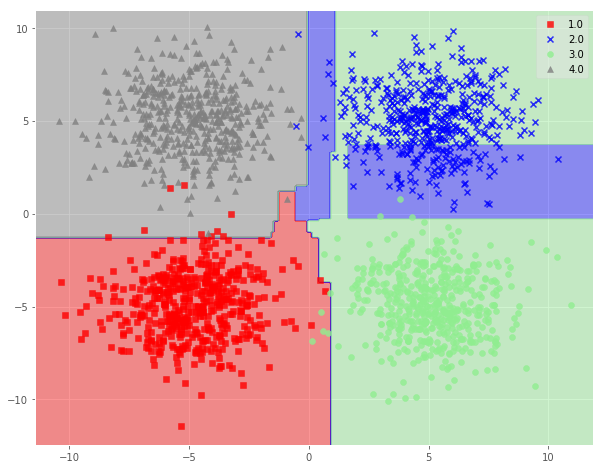

In [14]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-raa-10trees.svg',format='svg')

In [15]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Ypt.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(1000,) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,246,0,0,4,250
2.0,0,58,191,1,250
3.0,4,1,245,0,250
4.0,0,1,0,249,250
All,250,60,436,254,1000


In [16]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

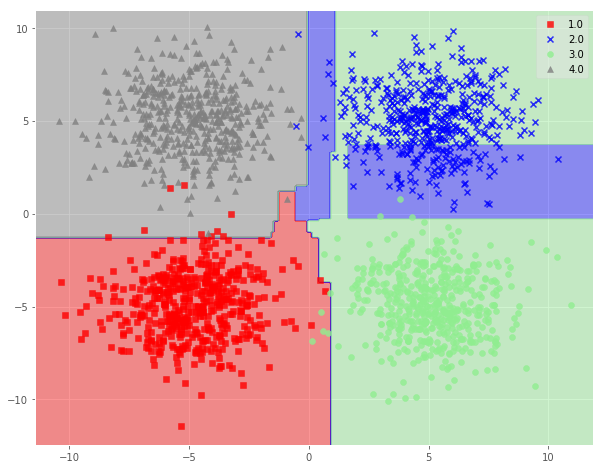

In [17]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

(10000, 2)
[1.0, 2.0, 3.0, 4.0]


tools.py:844: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)


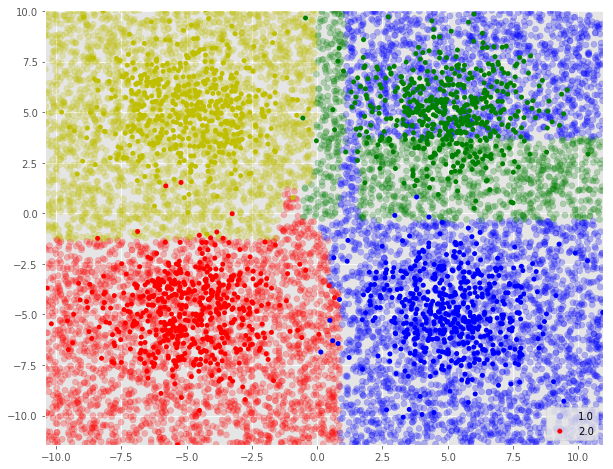

In [18]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

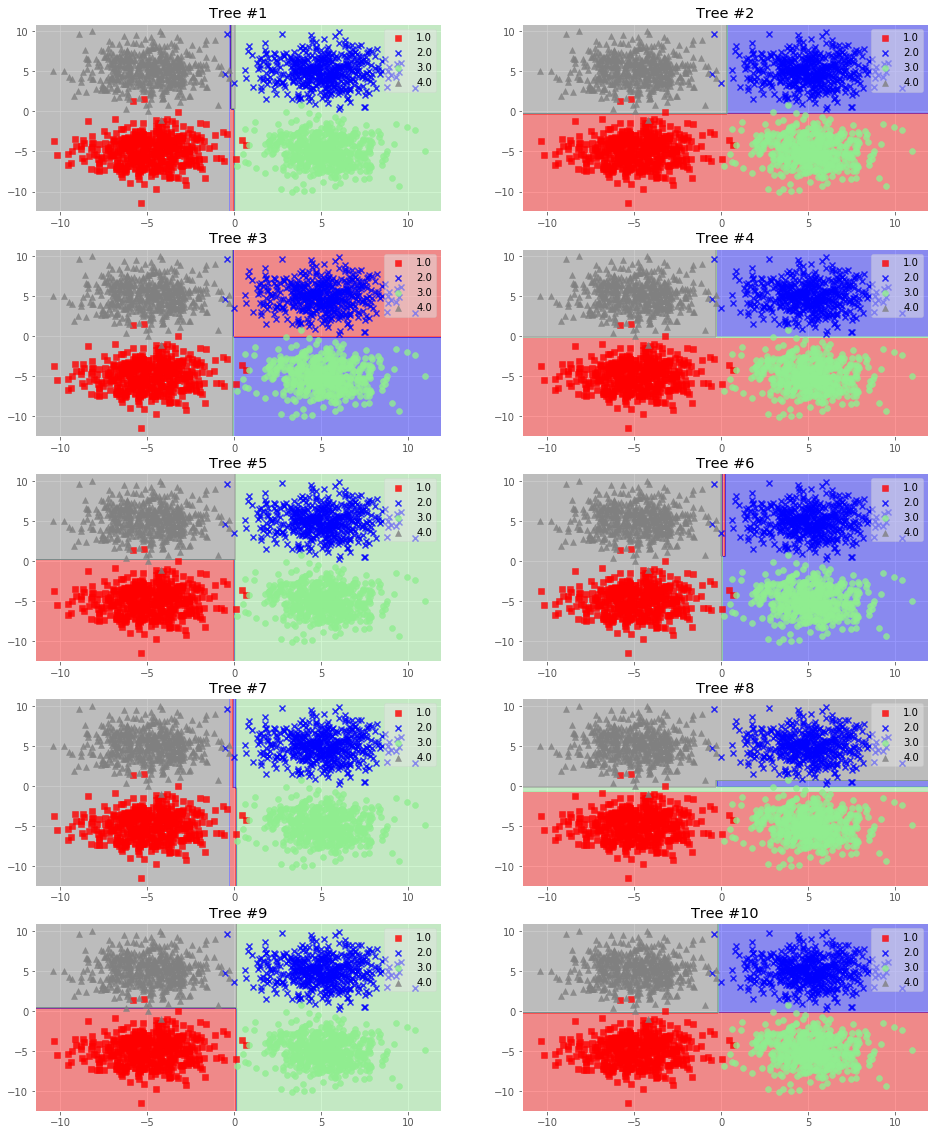

In [19]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

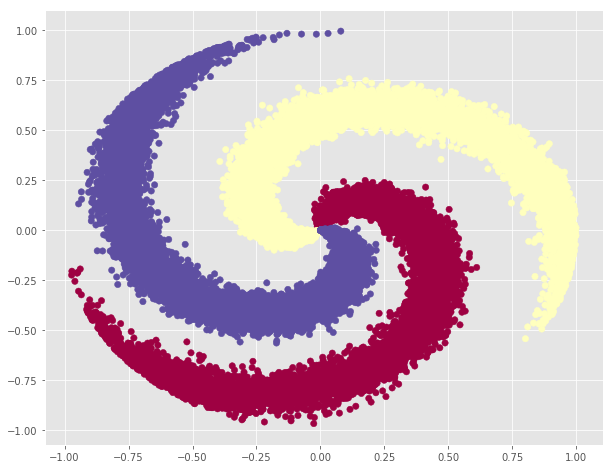

In [26]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

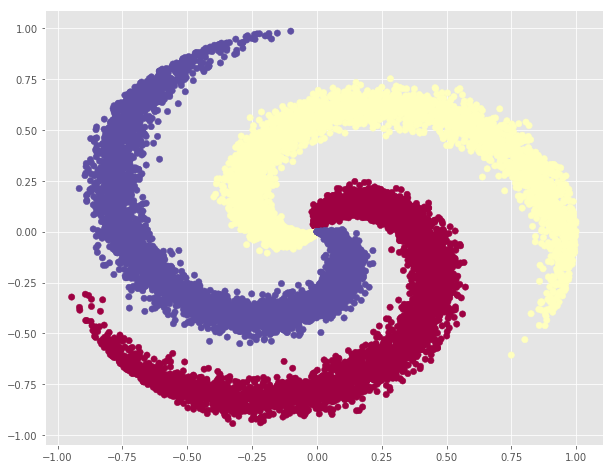

In [27]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [28]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random',usebagging=False)
rfc.train(X,Y)

Train Decision tree 1
Train Decision tree 2
Train Decision tree 3
Train Decision tree 4
Train Decision tree 5
Train Decision tree 6
Train Decision tree 7
Train Decision tree 8
Train Decision tree 9
Train Decision tree 10


In [29]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,7589,2292,119,10000
1,1162,8810,28,10000
2,86,1086,8828,10000
All,8837,12188,8975,30000


In [30]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0,1,2,All
Actual,,,,
0,3804,1147,49,5000
1,570,4413,17,5000
2,30,538,4432,5000
All,4404,6098,4498,15000


In [31]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

In [32]:
acc = np.sum(Y.reshape((Y.shape[0],1)) ==  np.array(Yp)) / float(Y.shape[0]) 
print acc

10000.0


(10000, 2)
[0, 1, 2]


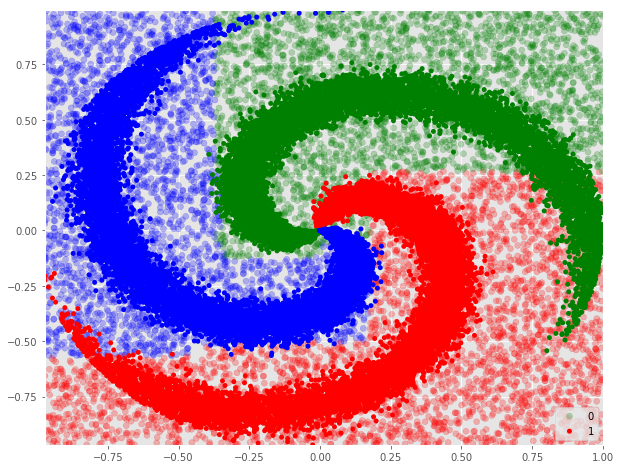

In [33]:
t.plot_points_range(rfc,X,Y)

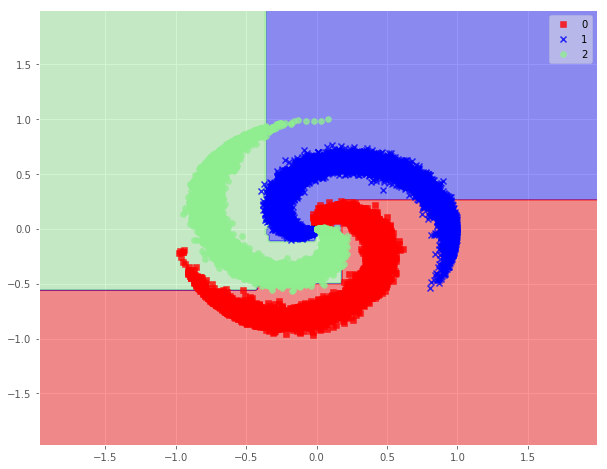

In [34]:
t.plot_decision_regions(X,Y,rfc)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

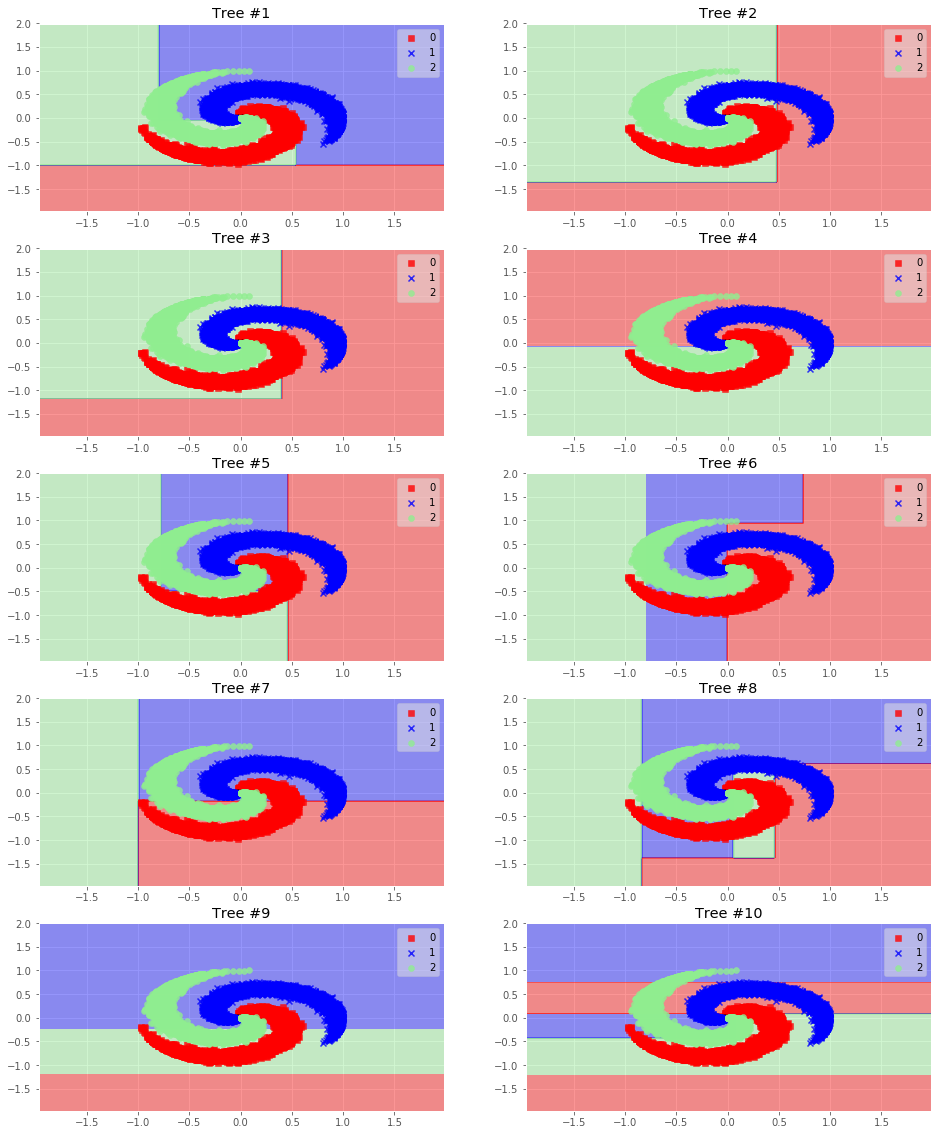

In [35]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

## TODO: Find Optimal Number of Trees for this data set, using cross validation...